# Web traffic timeseries

https://www.kaggle.com/c/web-traffic-time-series-forecasting

## Build a basic model

In [1]:
import numpy as np
import pandas as pd

In [2]:
training_set_sample = pd.read_csv('train_1_sample.csv')

In [130]:
training_set_sample[0:5]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [178]:
p1_data = (np.array(training_set_sample)[:,1:2]).astype('float32')

In [179]:
p1_data

array([[ 18.],
       [ 11.],
       [  1.],
       ..., 
       [  1.],
       [  2.],
       [ 14.]], dtype=float32)

In [180]:
p1_data.shape

(2999, 1)

In [188]:
for i in range(0, len(p1_data)):
	if pd.isnull(p1_data[i]):
		p1_data[i] =avg

In [189]:
p1_x = []
p1_y = []
for i in range(100, len(p1_data)):
	p1_x.append(p1_data[i - 100: i, 0])
	p1_y.append(p1_data[i, 0])

p1_x_np = np.array(p1_x)
p1_x_np = np.reshape(p1_x_np, (p1_x_np.shape[0], p1_x_np.shape[1], 1))
p1_y_np = np.array(p1_y)

In [190]:
model = Sequential()

In [191]:
from keras.models import Sequential
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(units = 10, input_shape= (p1_x_np.shape[1], 1)))
model.add(Dense(units = 1))

model.compile(optimizer='rmsprop', loss='mse')
model.fit(p1_x_np, p1_y_np, epochs = 2)

pred_in = p1_data[100:200,0]
pred_in_r = np.reshape(pred_in, (-1,100,1))

model.predict(pred_in_r)

Epoch 1/2
2899/2899 [==============================] - 28s - loss: 18307.0709    
Epoch 2/2
2899/2899 [==============================] - 29s - loss: 18254.8689    


array([[ 2.72745204]], dtype=float32)

### Basic model with multiple pages as input

replace all NaN in each row with average of that row

In [288]:
training_set_sample.shape

(50, 551)

In [289]:
training_set_sample = training_set_sample[0:50]

In [290]:
def reshapek(k):
    return k.reshape(k.shape[0], k.shape[1], 1)

In [294]:
print(len(training_set_sample.iloc[10,1:]))

550


In [324]:
p = 100
p_x = np.array([[]])
p_y = np.array([])
for i in range(0, training_set_sample.shape[0]):
    row = training_set_sample.iloc[i,1:]
    avg = np.average(row[pd.notnull(row)])
    new_row = row.fillna(avg)
    for j in range(p, len(row)):
        #print(i, j)
        if i == 0 and j == p:
            p_x = new_row[0: p]
            p_y = new_row[p]
        else:
            p_x = np.vstack((p_x, new_row[j - p: j]))
            #print(p_x.shape)
            p_y = np.vstack((p_y, new_row[p]))
            #np.append(p_y, new_row[p])

In [314]:
print(p_x.shape)
print(p_y.shape)

(22500, 100)
(22500, 1)


In [315]:
from keras.models import Sequential
from keras.layers import LSTM

In [322]:
p_x_reshaped = p_x.reshape(p_x.shape[0], p_x.shape[1], 1)

In [321]:
model = Sequential()
model.add(LSTM(units = 10, input_shape= (pall_x.shape[1], 1)))
model.add(Dense(units = 1))

model.compile(optimizer='rmsprop', loss='mse')
model.fit(p_x_reshaped, p_y, epochs = 2)

Epoch 1/2
22500/22500 [==============================] - 225s - loss: 874.2990   
Epoch 2/2
22500/22500 [==============================] - 211s - loss: 645.9307   


# Analyse the data

Load entire dataset

In [115]:
training_set = pd.read_csv('train_1.csv')

understand the shape

In [5]:
training_set.shape

(145063, 551)

look at a sample

In [6]:
training_set[0:5]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


## Split page column

In [ ]:
df_new = pd.DataFrame([i.split("_")[-3:] for i in training_set.Page], columns = ['project', 'access', 'agent'])

In [131]:
training_set = training_set.drop('Page', 1)

In [165]:
train_new = pd.concat([training_set, df_new], axis = 1)
train_new[0:5]

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,project,access,agent
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh.wikipedia.org,all-access,spider
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh.wikipedia.org,all-access,spider
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh.wikipedia.org,all-access,spider
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh.wikipedia.org,all-access,spider
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh.wikipedia.org,all-access,spider


## Fill NaNs /Drop

In [167]:
num_nans = train_new.isnull().T.any().sum()

In [168]:
float(num_nans)/train_new.size * 100

0.034637317085615196

only 0.03% of rows have NaNs, will drop those rows instead of filling with mean, then use the model built to predict those values and retrain the model

In [169]:
train_no_na = train_new.dropna()

In [170]:
train_no_na.shape

(117277, 553)

In [171]:
train_no_na[0:5]

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,project,access,agent
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh.wikipedia.org,all-access,spider
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh.wikipedia.org,all-access,spider
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh.wikipedia.org,all-access,spider
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh.wikipedia.org,all-access,spider
5,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,...,17.0,32.0,19.0,23.0,17.0,17.0,50.0,zh.wikipedia.org,all-access,spider


### Analyze the project, access and agent

In [201]:
np.unique(train_no_na.agent.values)

array(['all-agents', 'spider'], dtype=object)

In [215]:
%matplotlib inline
from collections import Counter
def plothist(series):
    counter = Counter(series.values)
    pd.DataFrame.from_dict(counter, orient='index').plot(kind='bar')

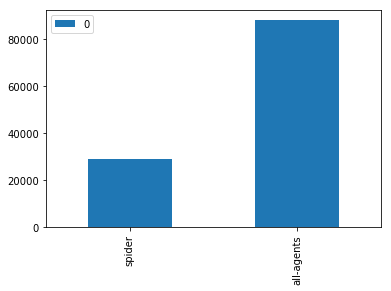

In [216]:
plothist(train_no_na.agent)

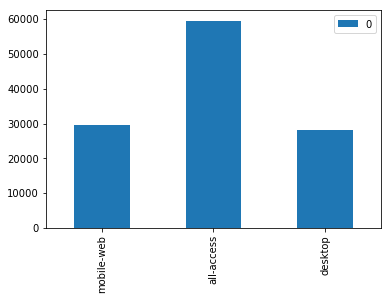

In [217]:
plothist(train_no_na.access)

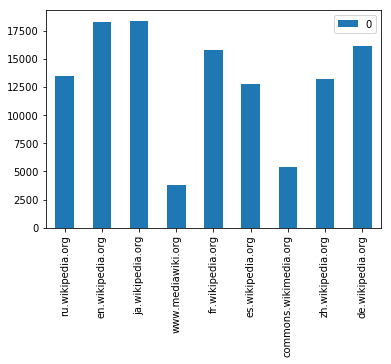

In [218]:
plothist(train_no_na.project)

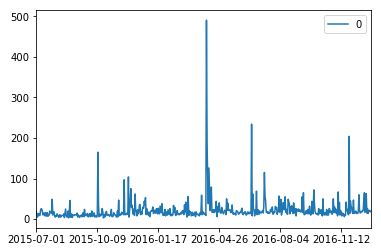

In [273]:
%matplotlib inline 
train_no_na.iloc[0:1,0:-3].T.plot()

## Strcuture the data for training

Split the data into train, valid and test

In [274]:
data = train_no_na

In [293]:
def splitDataset(data, valid_perc, test_perc):
    p1, p2, p3 = (data.shape[0], int(data.shape[0]*valid_perc), int(data.shape[0]*test_perc))
    train = data[0:p1 - (p2+p3)]
    valid = data[p1 - (p2 + p3): p1 - p3]
    test = data [p1 - p3:]
    return (train, valid, test)

In [294]:
data

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,project,access,agent
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh.wikipedia.org,all-access,spider
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh.wikipedia.org,all-access,spider
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh.wikipedia.org,all-access,spider
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh.wikipedia.org,all-access,spider
5,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,...,17.0,32.0,19.0,23.0,17.0,17.0,50.0,zh.wikipedia.org,all-access,spider
7,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,32.0,...,28.0,20.0,23.0,32.0,39.0,32.0,17.0,zh.wikipedia.org,all-access,spider
8,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,22.0,...,36.0,33.0,30.0,36.0,38.0,31.0,97.0,zh.wikipedia.org,all-access,spider
9,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,15.0,...,29.0,30.0,29.0,35.0,44.0,26.0,41.0,zh.wikipedia.org,all-access,spider
11,2.0,1.0,4.0,4.0,2.0,6.0,3.0,6.0,9.0,11.0,...,48.0,19.0,14.0,9.0,23.0,11.0,7.0,zh.wikipedia.org,all-access,spider
12,2.0,5.0,5.0,1.0,3.0,3.0,5.0,3.0,17.0,3.0,...,5.0,2.0,9.0,7.0,4.0,5.0,0.0,zh.wikipedia.org,all-access,spider
